# Overall Ratings Analysis

This notebook analyzes the overall ratings for chatbot conversations about HIV prevention and PrEP. We examine ratings from three perspectives:
- **User Rating**: How well the conversation met user needs
- **Self Rating**: Chatbot's self-assessment of performance  
- **Judge Rating**: Third-party expert evaluation

The data includes 500+ conversations across multiple languages with comprehensive metadata.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [41]:
# Load the overall ratings data
ratings_path = Path("../ratings/overall/overall_ratings.csv")
df = pd.read_csv(ratings_path)

print(f"Data shape: {df.shape}")
print(f"Languages: {df['primary_language'].nunique()} unique languages")
print("\n" + "="*50 + "\n")
print("SAMPLE DATA:")
print(df.head())
print("\n" + "="*50 + "\n")
print("DATA INFO:")
print(df.info())
print("\n" + "="*50 + "\n")
print("DATA DESCRIPTION:")
print(df.describe())

Data shape: (500, 10)
Languages: 8 unique languages


SAMPLE DATA:
  conversation_id  user_rating  self_rating  judge_rating  total_turns  \
0        conv_000          9.0          8.5           8.5           30   
1        conv_001          9.0          8.5           8.5           30   
2        conv_002          8.5          8.5           8.5           30   
3        conv_003          9.0          8.5           8.5           30   
4        conv_004          9.0          9.0           8.5           30   

   avg_user_length  avg_bot_length primary_language  error_rate  error_count  
0           100.13          667.90            Dutch       0.533           16  
1            96.13          675.60          English       0.533           16  
2            96.83          680.87          English       0.533           16  
3            96.57          633.43       Portuguese       0.533           16  
4            93.27          604.93          Spanish       0.533           16  


DATA INFO:
<

## Rating Distributions

How the three different rating perspectives compare across all conversations.

RATING STATISTICS:

USER_RATING:
  Mean: 8.98
  Median: 9.00
  Std: 0.10
  Range: 8.5 - 9.0

SELF_RATING:
  Mean: 8.73
  Median: 8.50
  Std: 0.26
  Range: 7.5 - 9.0

JUDGE_RATING:
  Mean: 8.67
  Median: 8.50
  Std: 0.25
  Range: 7.5 - 9.5


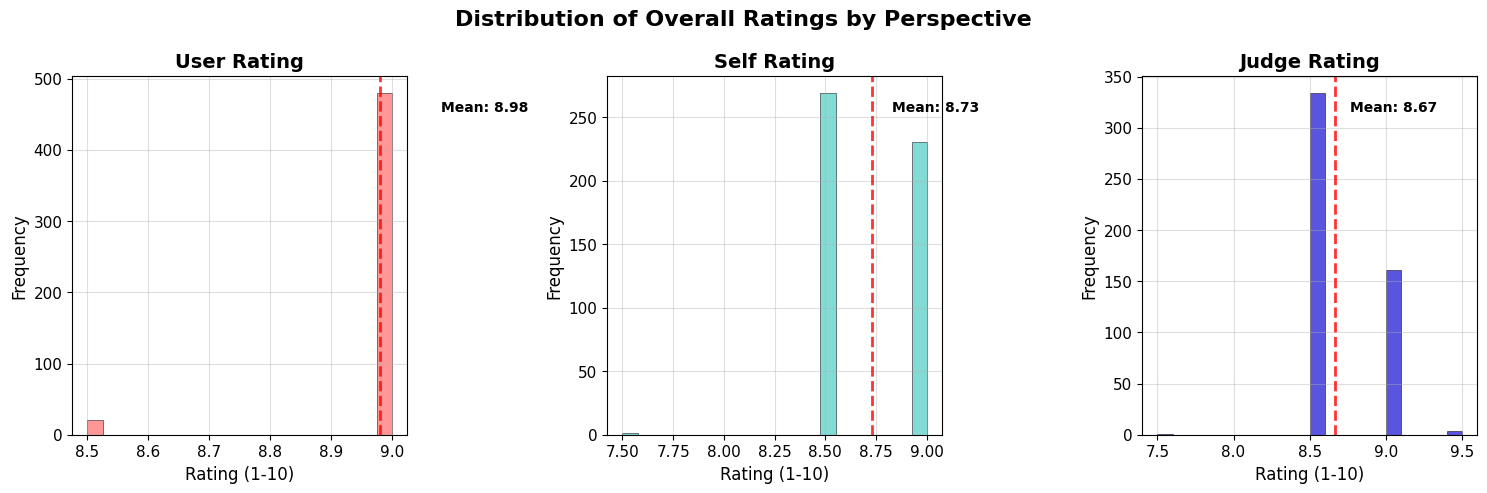

In [33]:
# Rating statistics
rating_cols = ['user_rating', 'self_rating', 'judge_rating']
print("RATING STATISTICS:")
print("="*60)
for col in rating_cols:
    print(f"\n{col.upper()}:")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Std: {df[col].std():.2f}")
    print(f"  Range: {df[col].min():.1f} - {df[col].max():.1f}")

# Create histograms for each rating type
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribution of Overall Ratings by Perspective', fontsize=16, fontweight='bold')

colors = ['#FF6B6B', '#4ECDC4', "#130DD0"]
titles = ['User Rating', 'Self Rating', 'Judge Rating']

for i, (col, color, title) in enumerate(zip(rating_cols, colors, titles)):
    axes[i].hist(df[col], bins=20, alpha=0.7, color=color, edgecolor='black', linewidth=0.5)
    axes[i].set_title(title, fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Rating (1-10)', fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].grid(True, alpha=0.4)
    
    mean_val = df[col].mean()
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, alpha=0.8)
    axes[i].text(mean_val + 0.1, axes[i].get_ylim()[1] * 0.9, f'Mean: {mean_val:.2f}', 
                fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

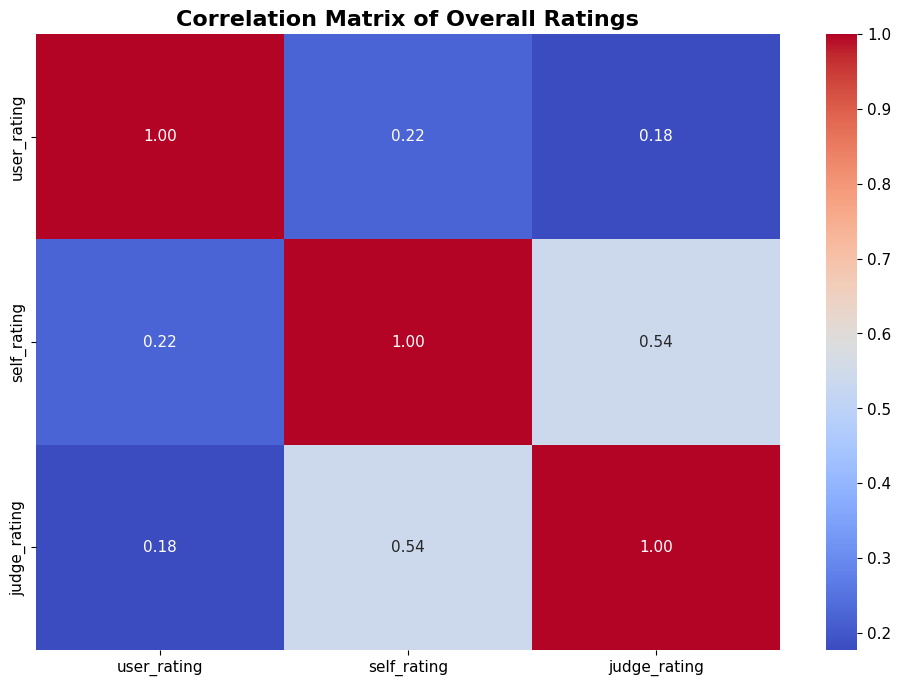

In [38]:
# Correlation analysis
correlation_matrix = df[rating_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Overall Ratings', fontsize=16, fontweight='bold')
plt.show()

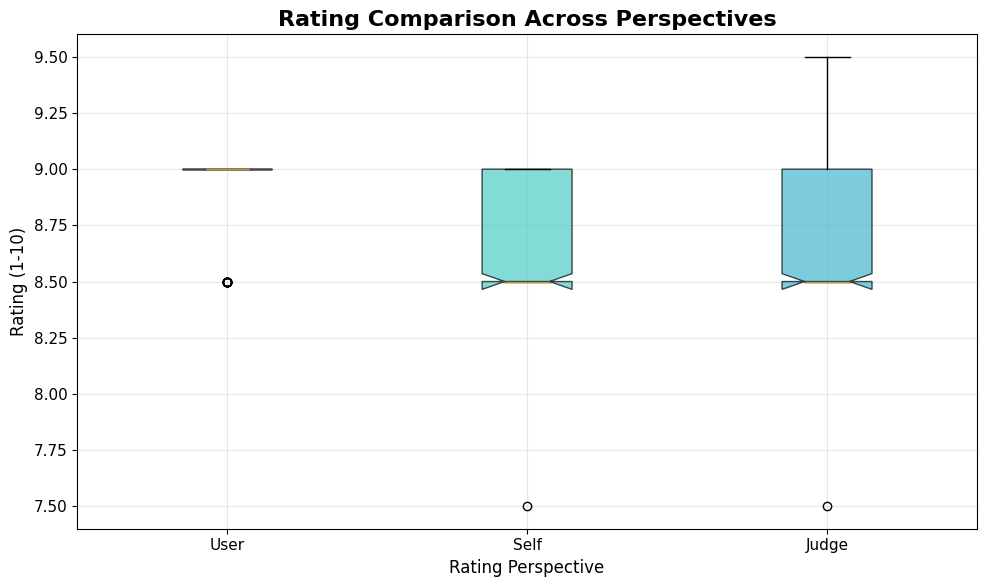


CORRELATION BETWEEN RATING PERSPECTIVES:
              user_rating  self_rating  judge_rating
user_rating         1.000        0.223         0.177
self_rating         0.223        1.000         0.540
judge_rating        0.177        0.540         1.000


In [34]:
# Box plot comparison of all ratings
plt.figure(figsize=(10, 6))
rating_data = [df['user_rating'], df['self_rating'], df['judge_rating']]
box_plot = plt.boxplot(rating_data, labels=['User', 'Self', 'Judge'], 
                       patch_artist=True, notch=True)

# Customize box colors
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.title('Rating Comparison Across Perspectives', fontsize=16, fontweight='bold')
plt.ylabel('Rating (1-10)', fontsize=12)
plt.xlabel('Rating Perspective', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Correlation analysis
correlation_matrix = df[rating_cols].corr()
print("\nCORRELATION BETWEEN RATING PERSPECTIVES:")
print("="*50)
print(correlation_matrix.round(3))

## Language Analysis

How do ratings vary across different languages?

🌍 LANGUAGE DISTRIBUTION:
English     : 131 conversations ( 26.2%)
Spanish     :  94 conversations ( 18.8%)
French      :  81 conversations ( 16.2%)
Dutch       :  64 conversations ( 12.8%)
Swahili     :  51 conversations ( 10.2%)
Portuguese  :  34 conversations (  6.8%)
German      :  27 conversations (  5.4%)
Arabic      :  18 conversations (  3.6%)


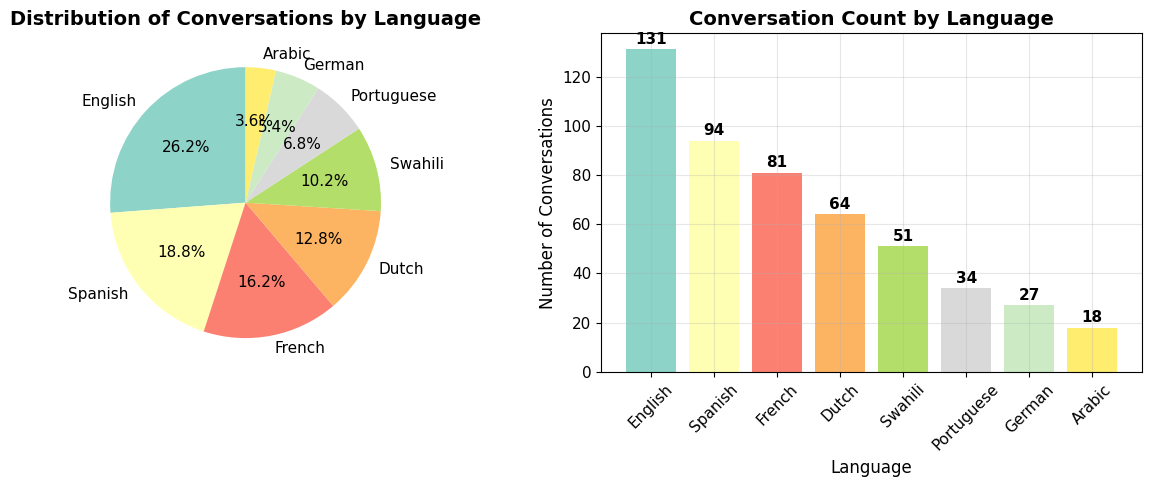

In [9]:
# Language distribution
lang_counts = df['primary_language'].value_counts()
print("🌍 LANGUAGE DISTRIBUTION:")
print("="*40)
for lang, count in lang_counts.items():
    pct = (count / len(df)) * 100
    print(f"{lang:<12}: {count:3d} conversations ({pct:5.1f}%)")

# Create language distribution pie chart
plt.figure(figsize=(12, 5))

# Pie chart
plt.subplot(1, 2, 1)
colors = plt.cm.Set3(np.linspace(0, 1, len(lang_counts)))
wedges, texts, autotexts = plt.pie(lang_counts.values, labels=lang_counts.index, 
                                   autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of Conversations by Language', fontsize=14, fontweight='bold')

# Bar chart
plt.subplot(1, 2, 2)
bars = plt.bar(range(len(lang_counts)), lang_counts.values, color=colors)
plt.title('Conversation Count by Language', fontsize=14, fontweight='bold')
plt.xlabel('Language', fontsize=12)
plt.ylabel('Number of Conversations', fontsize=12)
plt.xticks(range(len(lang_counts)), lang_counts.index, rotation=45)
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar, count in zip(bars, lang_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Ratings by language
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Ratings Analysis by Language', fontsize=16, fontweight='bold')

# Average ratings by language
lang_avg_ratings = df.groupby('primary_language')[rating_cols].mean().round(2)
print("\n📊 AVERAGE RATINGS BY LANGUAGE:")
print("="*60)
print(lang_avg_ratings)

# Plot 1: Average ratings by language (bar plot)
ax1 = axes[0, 0]
x_pos = np.arange(len(lang_avg_ratings))
width = 0.25
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for i, (col, color) in enumerate(zip(rating_cols, colors)):
    bars = ax1.bar(x_pos + i*width, lang_avg_ratings[col], width, 
                   label=col.replace('_', ' ').title(), color=color, alpha=0.8)
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.1f}', ha='center', va='bottom', fontsize=9)

ax1.set_xlabel('Language')
ax1.set_ylabel('Average Rating')
ax1.set_title('Average Ratings by Language')
ax1.set_xticks(x_pos + width)
ax1.set_xticklabels(lang_avg_ratings.index, rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Rating distribution heatmap
ax2 = axes[0, 1]
sns.heatmap(lang_avg_ratings.T, annot=True, cmap='RdYlBu_r', ax=ax2, 
            cbar_kws={'label': 'Average Rating'}, fmt='.2f')
ax2.set_title('Rating Heatmap by Language')
ax2.set_xlabel('Language')
ax2.set_ylabel('Rating Type')

# Plot 3: User rating distribution by language
ax3 = axes[1, 0]
for lang in df['primary_language'].unique():
    lang_data = df[df['primary_language'] == lang]['user_rating']
    ax3.hist(lang_data, alpha=0.6, label=f'{lang} (n={len(lang_data)})', bins=10)
ax3.set_xlabel('User Rating')
ax3.set_ylabel('Frequency')
ax3.set_title('User Rating Distribution by Language')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Error rate vs ratings
ax4 = axes[1, 1]
scatter = ax4.scatter(df['error_rate'], df['user_rating'], 
                     c=df['primary_language'].astype('category').cat.codes, 
                     alpha=0.6, s=50, cmap='tab10')
ax4.set_xlabel('Error Rate')
ax4.set_ylabel('User Rating')
ax4.set_title('User Rating vs Error Rate by Language')
ax4.grid(True, alpha=0.3)

# Add colorbar for languages
cbar = plt.colorbar(scatter, ax=ax4)
cbar.set_label('Language')

plt.tight_layout()
plt.show()

## Conversation Characteristics

How do conversation length and response characteristics relate to ratings?

In [ ]:
# Conversation characteristics analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Conversation Characteristics vs Ratings', fontsize=16, fontweight='bold')

# Plot 1: User message length vs rating
ax1 = axes[0, 0]
scatter1 = ax1.scatter(df['avg_user_length'], df['user_rating'], alpha=0.6, s=50, c='#FF6B6B')
ax1.set_xlabel('Average User Message Length (characters)')
ax1.set_ylabel('User Rating')
ax1.set_title('User Rating vs User Message Length')
ax1.grid(True, alpha=0.3)

# Add correlation coefficient
corr1 = df['avg_user_length'].corr(df['user_rating'])
ax1.text(0.05, 0.95, f'Correlation: {corr1:.3f}', transform=ax1.transAxes, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Plot 2: Bot response length vs rating
ax2 = axes[0, 1]
scatter2 = ax2.scatter(df['avg_bot_length'], df['judge_rating'], alpha=0.6, s=50, c='#4ECDC4')
ax2.set_xlabel('Average Bot Response Length (characters)')
ax2.set_ylabel('Judge Rating')
ax2.set_title('Judge Rating vs Bot Response Length')
ax2.grid(True, alpha=0.3)

corr2 = df['avg_bot_length'].corr(df['judge_rating'])
ax2.text(0.05, 0.95, f'Correlation: {corr2:.3f}', transform=ax2.transAxes,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Plot 3: Error rate vs ratings
ax3 = axes[1, 0]
ax3.scatter(df['error_rate'], df['user_rating'], alpha=0.6, s=50, c='#45B7D1', label='User')
ax3.scatter(df['error_rate'], df['self_rating'], alpha=0.6, s=50, c='#96CEB4', label='Self')
ax3.scatter(df['error_rate'], df['judge_rating'], alpha=0.6, s=50, c='#FECA57', label='Judge')
ax3.set_xlabel('Error Rate')
ax3.set_ylabel('Rating')
ax3.set_title('Ratings vs Error Rate')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Response length distribution
ax4 = axes[1, 1]
ax4.hist(df['avg_bot_length'], bins=30, alpha=0.7, color='#FF6B6B', edgecolor='black')
ax4.set_xlabel('Average Bot Response Length (characters)')
ax4.set_ylabel('Frequency')
ax4.set_title('Distribution of Bot Response Lengths')
ax4.grid(True, alpha=0.3)

# Add statistics
mean_length = df['avg_bot_length'].mean()
median_length = df['avg_bot_length'].median()
ax4.axvline(mean_length, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_length:.0f}')
ax4.axvline(median_length, color='blue', linestyle='--', linewidth=2, label=f'Median: {median_length:.0f}')
ax4.legend()

plt.tight_layout()
plt.show()

print("\n📊 CONVERSATION CHARACTERISTICS SUMMARY:")
print("="*60)
print(f"Average user message length: {df['avg_user_length'].mean():.1f} characters")
print(f"Average bot response length: {df['avg_bot_length'].mean():.1f} characters")
print(f"Average error rate: {df['error_rate'].mean():.3f}")
print(f"Total turns per conversation: {df['total_turns'].iloc[0]}")
print(f"Range of user message lengths: {df['avg_user_length'].min():.0f} - {df['avg_user_length'].max():.0f}")
print(f"Range of bot response lengths: {df['avg_bot_length'].min():.0f} - {df['avg_bot_length'].max():.0f}")

## 🎯 Key Insights & Summary

Let's summarize the main findings and create a comprehensive overview.

In [ ]:
# Create a comprehensive summary dashboard
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)

# Top banner - Overall statistics
ax_banner = fig.add_subplot(gs[0, :])
ax_banner.axis('off')

# Calculate key metrics
total_conversations = len(df)
avg_user_rating = df['user_rating'].mean()
avg_self_rating = df['self_rating'].mean()
avg_judge_rating = df['judge_rating'].mean()
num_languages = df['primary_language'].nunique()
avg_response_length = df['avg_bot_length'].mean()

# Create text summary
summary_text = f"""
📊 CHATBOT EVALUATION DASHBOARD - OVERALL RATINGS ANALYSIS

Total Conversations Analyzed: {total_conversations:,}
Languages Supported: {num_languages}
Average Ratings: User={avg_user_rating:.2f} | Self={avg_self_rating:.2f} | Judge={avg_judge_rating:.2f}
Average Bot Response Length: {avg_response_length:.0f} characters
"""

ax_banner.text(0.5, 0.5, summary_text, transform=ax_banner.transAxes, 
               fontsize=16, fontweight='bold', ha='center', va='center',
               bbox=dict(boxstyle="round,pad=0.5", facecolor="#E8F4FD", alpha=0.8))

# Plot 1: Rating comparison (violin plot)
ax1 = fig.add_subplot(gs[1, 0])
parts = ax1.violinplot([df['user_rating'], df['self_rating'], df['judge_rating']], 
                       positions=[1, 2, 3], showmeans=True, showmedians=True)
ax1.set_xticks([1, 2, 3])
ax1.set_xticklabels(['User', 'Self', 'Judge'])
ax1.set_ylabel('Rating (1-10)')
ax1.set_title('Rating Distributions', fontweight='bold')
ax1.grid(True, alpha=0.3)

# Plot 2: Top languages by conversation count
ax2 = fig.add_subplot(gs[1, 1])
top_langs = df['primary_language'].value_counts().head(6)
bars = ax2.bar(range(len(top_langs)), top_langs.values, color='skyblue', alpha=0.8)
ax2.set_xticks(range(len(top_langs)))
ax2.set_xticklabels(top_langs.index, rotation=45)
ax2.set_ylabel('Conversations')
ax2.set_title('Top Languages', fontweight='bold')
for bar, count in zip(bars, top_langs.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             str(count), ha='center', va='bottom', fontsize=10)

# Plot 3: Rating consistency (standard deviation across perspectives)
ax3 = fig.add_subplot(gs[1, 2])
df['rating_std'] = df[rating_cols].std(axis=1)
ax3.hist(df['rating_std'], bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
ax3.set_xlabel('Standard Deviation')
ax3.set_ylabel('Frequency')
ax3.set_title('Rating Consistency\n(Lower = More Consistent)', fontweight='bold')
ax3.grid(True, alpha=0.3)

# Plot 4: Error rate impact
ax4 = fig.add_subplot(gs[1, 3])
# Bin error rates and calculate average ratings
df['error_bin'] = pd.cut(df['error_rate'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
error_ratings = df.groupby('error_bin')['user_rating'].mean()
bars = ax4.bar(range(len(error_ratings)), error_ratings.values, color='gold', alpha=0.8)
ax4.set_xticks(range(len(error_ratings)))
ax4.set_xticklabels(error_ratings.index, rotation=45)
ax4.set_ylabel('Average User Rating')
ax4.set_title('Error Rate vs Rating', fontweight='bold')

# Plot 5: Language performance heatmap
ax5 = fig.add_subplot(gs[2, :2])
lang_ratings = df.groupby('primary_language')[rating_cols].mean()
sns.heatmap(lang_ratings, annot=True, cmap='RdYlGn', ax=ax5, 
            cbar_kws={'label': 'Average Rating'}, fmt='.2f')
ax5.set_title('Average Ratings by Language', fontweight='bold')
ax5.set_xlabel('Rating Perspective')
ax5.set_ylabel('Language')

# Plot 6: Response length vs ratings scatter
ax6 = fig.add_subplot(gs[2, 2:])
colors = df['primary_language'].astype('category').cat.codes
scatter = ax6.scatter(df['avg_bot_length'], df['user_rating'], 
                     c=colors, alpha=0.6, s=30, cmap='tab10')
ax6.set_xlabel('Average Bot Response Length (characters)')
ax6.set_ylabel('User Rating')
ax6.set_title('Response Length vs User Rating (colored by language)', fontweight='bold')
ax6.grid(True, alpha=0.3)

plt.suptitle('HIV/PrEP Chatbot Evaluation - Overall Ratings Analysis', 
             fontsize=20, fontweight='bold', y=0.98)
plt.show()

# Print key insights
print("\n" + "="*80)
print("🎯 KEY INSIGHTS FROM OVERALL RATINGS ANALYSIS")
print("="*80)

print(f"\n📈 RATING TRENDS:")
print(f"   • User ratings: {df['user_rating'].mean():.2f} ± {df['user_rating'].std():.2f}")
print(f"   • Self ratings: {df['self_rating'].mean():.2f} ± {df['self_rating'].std():.2f}")
print(f"   • Judge ratings: {df['judge_rating'].mean():.2f} ± {df['judge_rating'].std():.2f}")

print(f"\n🌍 LANGUAGE PERFORMANCE:")
best_lang = lang_avg_ratings['user_rating'].idxmax()
worst_lang = lang_avg_ratings['user_rating'].idxmin()
print(f"   • Best performing language: {best_lang} ({lang_avg_ratings.loc[best_lang, 'user_rating']:.2f})")
print(f"   • Lowest performing language: {worst_lang} ({lang_avg_ratings.loc[worst_lang, 'user_rating']:.2f})")

print(f"\n📊 CONVERSATION CHARACTERISTICS:")
print(f"   • Response length correlation with ratings: {df['avg_bot_length'].corr(df['user_rating']):.3f}")
print(f"   • Error rate correlation with ratings: {df['error_rate'].corr(df['user_rating']):.3f}")
print(f"   • Most consistent ratings (low std): {df['rating_std'].min():.3f}")
print(f"   • Least consistent ratings (high std): {df['rating_std'].max():.3f}")

print(f"\n🎯 RECOMMENDATIONS:")
if df['avg_bot_length'].corr(df['user_rating']) > 0.1:
    print("   • Longer responses tend to receive higher ratings")
elif df['avg_bot_length'].corr(df['user_rating']) < -0.1:
    print("   • Shorter responses tend to receive higher ratings")
else:
    print("   • Response length has minimal impact on ratings")

if df['error_rate'].corr(df['user_rating']) < -0.2:
    print("   • Focus on reducing errors to improve user satisfaction")
else:
    print("   • Error rate shows minimal correlation with ratings")

print("\n" + "="*80)